# Arquivo 1

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'axes.grid':False})
sns.set_context('notebook')

np.random.seed(42)

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving base_agrupamento_2.csv to base_agrupamento_2.csv
Arquivo "base_agrupamento_2.csv" importado pelo usuário com tamanho de 13736 bytes


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


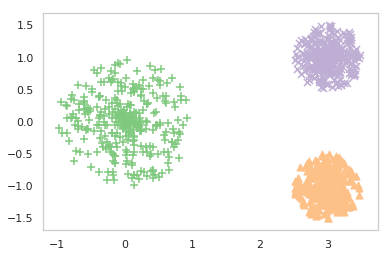

In [4]:
baseDados = pd.read_csv('base_agrupamento_1.csv')

markers = {1: '+',
           2: 'x',
           3: '^'}

for clu in baseDados.clu.unique():
  plt.scatter(baseDados.X[baseDados.clu == clu], 
              baseDados.Y[baseDados.clu == clu],
              s=50,
              marker=markers[clu],
              c = plt.cm.Accent.colors[clu -1])

# Arquivo 2

In [0]:
baseDados_2 = pd.read_csv('base_agrupamento_2.csv')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


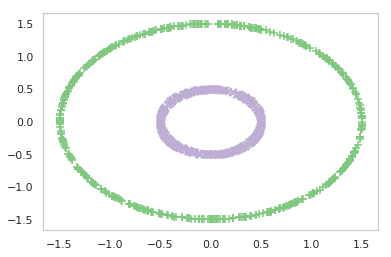

In [8]:
for clu in baseDados_2.clu.unique():
  plt.scatter(baseDados_2.X[baseDados_2.clu == clu], 
              baseDados_2.Y[baseDados_2.clu == clu],
              s=50,
              marker=markers[clu],
              c = plt.cm.Accent.colors[clu -1])

In [0]:
from sklearn.cluster import KMeans

np.random.seed(43)

baseDados = pd.read_csv('base_agrupamento_1.csv')

X = baseDados[['X', 'Y']]
centers = np.array([[np.random.uniform(baseDados.X.min(), baseDados.X.max()), np.random.uniform(baseDados.Y.min(), baseDados.Y.max())] for i in range(3)])

h = 0.005
x_min, x_max = baseDados.X.min() - 1, baseDados.X.max() + 1
y_min, y_max = baseDados.Y.min() - 1, baseDados.Y.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

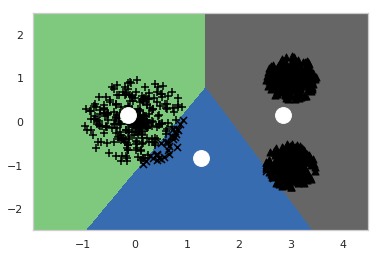

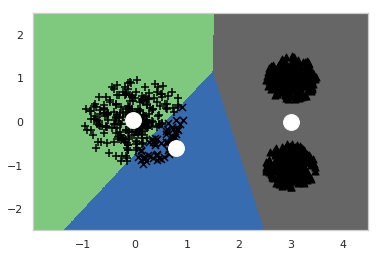

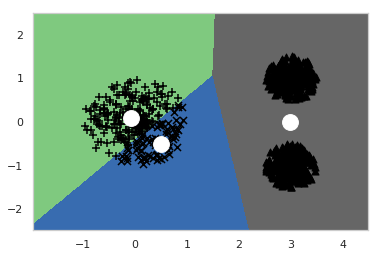

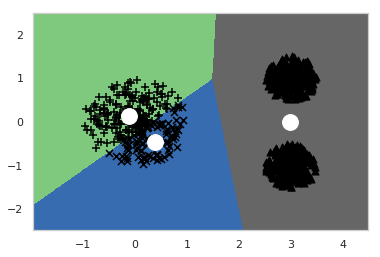

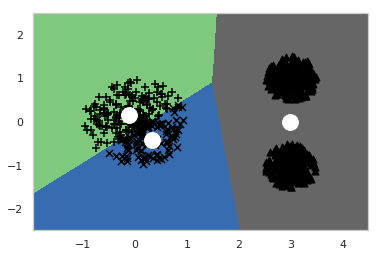

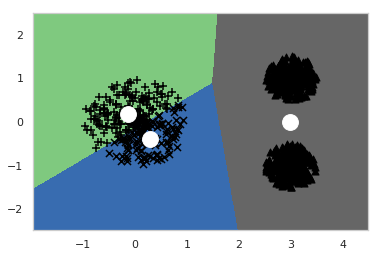

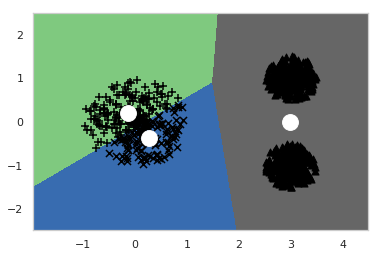

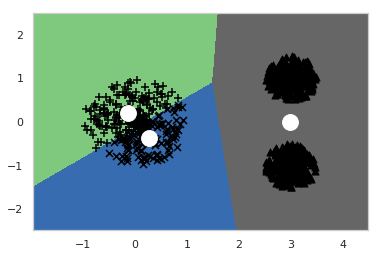

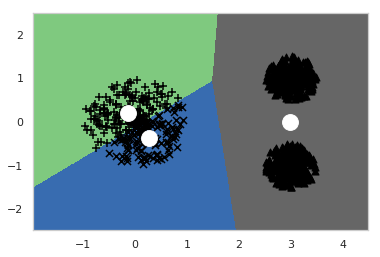

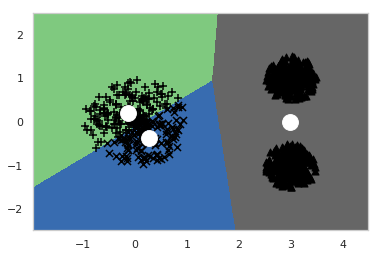

In [11]:
for _ in range(10):
    km = KMeans(n_clusters = 3, n_init = 1, init = centers, max_iter=1)
    baseDados['kmeans'] = km.fit_predict(X)
    
    # Nesta parte imprimimos a area colorida no fundo
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Accent,
               aspect='auto', origin='lower')

    # Nesta parte imprimimos os pontos
    markers = {0 : '+', 1 : 'x', 2 : '^'}
    for clu in baseDados.kmeans.unique():
        plt.scatter(baseDados.X[baseDados.kmeans == clu],
                    baseDados.Y[baseDados.kmeans == clu],
                    s = 50,
                    marker = markers[clu],
                    c = 'black')

    for centroide in km.cluster_centers_:
        plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
    centers = km.cluster_centers_
    plt.show()

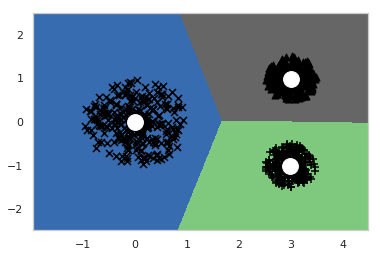

In [12]:
km = KMeans(n_clusters = 3, n_init = 3, init = 'k-means++', max_iter=300)
baseDados['kmeans'] = km.fit_predict(X)

# Nesta parte imprimimos a area colorida no fundo
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Accent,
           aspect='auto', origin='lower')

# Nesta parte imprimimos os pontos
markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in baseDados.kmeans.unique():
    plt.scatter(baseDados.X[baseDados.kmeans == clu],
                baseDados.Y[baseDados.kmeans == clu],
                s = 50,
                marker = markers[clu],
                c = 'black')

for centroide in km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
centers = km.cluster_centers_
plt.show()

In [0]:
baseDados = pd.read_csv('base_agrupamento_2.csv')
X = baseDados[['X','Y']]

h = .005
x_min, x_max = baseDados.X.min() - 1, baseDados.X.max() + 1
y_min, y_max = baseDados.Y.min() - 1, baseDados.Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

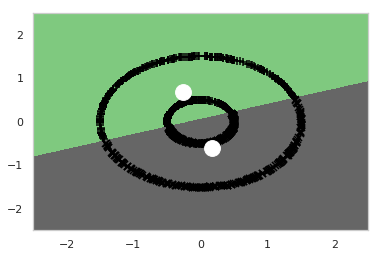

In [14]:
km = KMeans(n_clusters = 2, n_init = 3, init = 'k-means++', max_iter=300)
baseDados['kmeans'] = km.fit_predict(X)

# Nesta parte imprimimos a area colorida no fundo
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Accent,
           aspect='auto', origin='lower')

# Nesta parte imprimimos os pontos
markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in baseDados.kmeans.unique():
    plt.scatter(baseDados.X[baseDados.kmeans == clu],
                baseDados.Y[baseDados.kmeans == clu],
                s = 50,
                marker = markers[clu],
                c = 'black')

for centroide in km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
centers = km.cluster_centers_
plt.show()
